In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/carvana-predict-car-prices/carvana.csv


In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error

In [3]:
df = pd.read_csv("/kaggle/input/carvana-predict-car-prices/carvana.csv")
df.head()

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990


In [4]:
df.shape

(22000, 4)

In [5]:
df.isnull().sum()

Name     0
Year     0
Miles    0
Price    0
dtype: int64

In [6]:
df.nunique()

Name      416
Year      211
Miles    8836
Price     866
dtype: int64

In [7]:
corr = df.corr()
corr

,Year,Miles,Price
Year,1.000000,-0.028941,0.141570
Miles,-0.028941,1.000000,-0.474124
Price,0.141570,-0.474124,1.000000


<AxesSubplot:>

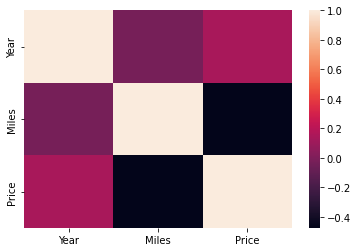

In [8]:
sns.heatmap(corr)

**Building Machine Learning Model******

In [9]:
target = "Price"
features = ["Year", "Miles", "Name"]
X_train = df[features]
y_train = df[target]

Baseline Model

In [10]:
y_mean = y_train.mean()
y_pred_baseline = [y_mean] * len(y_train)
mae_baseline = mean_absolute_error(y_train, y_pred_baseline)
print("The value of y_mean is ", y_mean)
print("The value of baseline mean absolute error is ", mae_baseline)

The value of y_mean is  20707.285136363636
The value of baseline mean absolute error is  4287.342693004132


In [11]:
# plt.scatter(X_train, y_train)
# # plt.xlabel()
# # plt.y_label()

We will use the simple imputer i.e transformer it will remove the nan values with the mean

Similarly we will use onehotencoder that will change the name columns to categorical variable

In [12]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from category_encoders import OneHotEncoder

In [13]:
model = make_pipeline(
    OneHotEncoder(use_cat_names=True), SimpleImputer(),
    LinearRegression()
)
model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['Name'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()),
                ('linearregression', LinearRegression())])

In [14]:
y_pred_training = model.predict(X_train)
mae = mean_absolute_error(y_train, y_pred_training)
print("The mean absolute error for the trained model is ", mae)

The mean absolute error for the trained model is  1809.7872995174453
